<a href="https://colab.research.google.com/github/xtianu/docencia/blob/main/UT/Test/Tirana_CV_Test_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EEIGM 2025**
# Procesado de imagen: TEST FINAL

Profesor: Christian Mata

**Instrucciones**
Crea tu ejercicio usando un gitHub y GoogleColab y envíalo a: christian.mata@upc.edu

(puedes usar tus apuntes de clase)

Tiempo estimado: 1h

## 1. Carga y visualiza la imagen ‘acero’ (usando Google Drive o cargando manualmente la imagen) usando la librería skimage. Informa del tamaño de la imagen, del tipo de imagen y del rango de los niveles de gris de los píxeles.

*(0,5 puntos)*

In [7]:
from google.colab import files # load skimage libraries
import io
uploaded = files.upload()

Saving acero.png to acero.png


In [8]:
import skimage as sk # load skimage libraries
from skimage import io
I = sk.io.imread('acero.png') # read image using imread function

Tamaño de la imagen

In [9]:
I.shape

(1024, 1024, 3)

Tipo de imagen 'unit8' -> pixeles de 0 hasta 255

In [11]:
I.dtype

dtype('uint8')

In [13]:
import numpy  as np
from skimage import img_as_ubyte
IG = sk.color.rgb2gray(I)
IG_unit8 = img_as_ubyte(IG)

/tmp/ipython-input-1534323884.py:3: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  sk.io.imshow(I) # visualize image using imshow function
/tmp/ipython-input-1534323884.py:4: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  sk.io.show()


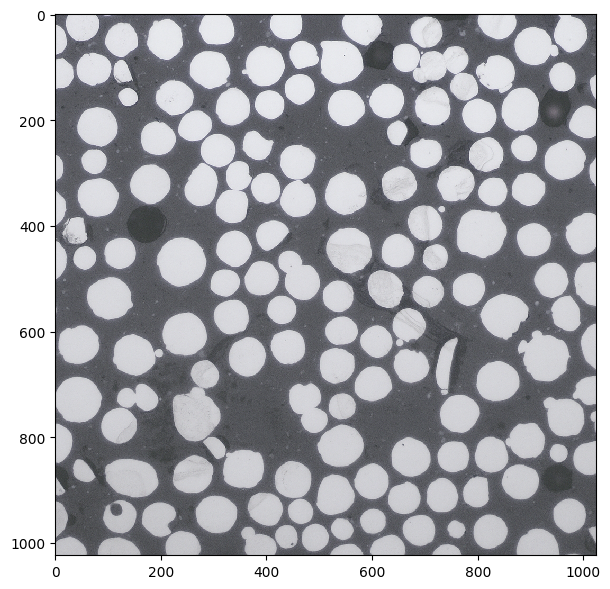

In [14]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,6))
sk.io.imshow(I) # visualize image using imshow function
sk.io.show()

## 2. Representa el histograma de la imagen. Explica los picos del histograma en función de las regiones de la imagen.

*(0,5 puntos)*

Descripción del resultado obtenido:

El histograma muestra dos picos principales:

    Un pico a la izquierda que corresponde a las regiones oscuras de la imagen

    Un pico a la derecha que corresponde a las regiones claras de la imagen

    Eso alude bien a una imagen en nivel de grises



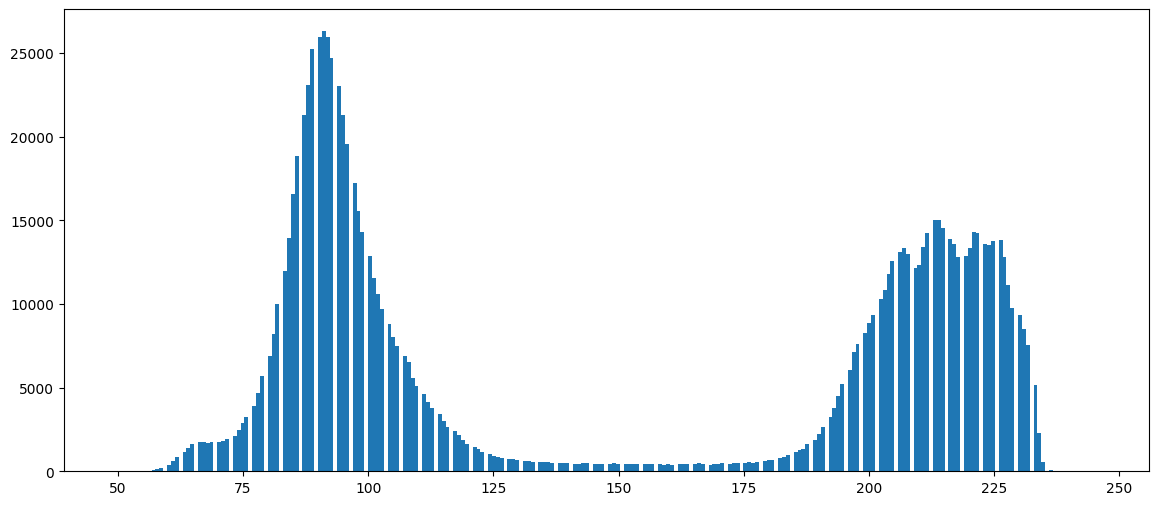

In [15]:
# reshape the uint8 image as 1d array:
v = IG_unit8.reshape(IG_unit8.shape[0]*IG_unit8.shape[1],1)

fig = plt.figure(figsize=(14, 6))
plt.hist(v, bins=255,density=False)
plt.show()

## 3. Aplica ruido a la imagen y utiliza la función adecuada para eliminar dicho ruido. Muestra un plot de tres imágenes (imagen original, imagen con ruído e imagen filtrada sin ruido).

*(1 punto)*

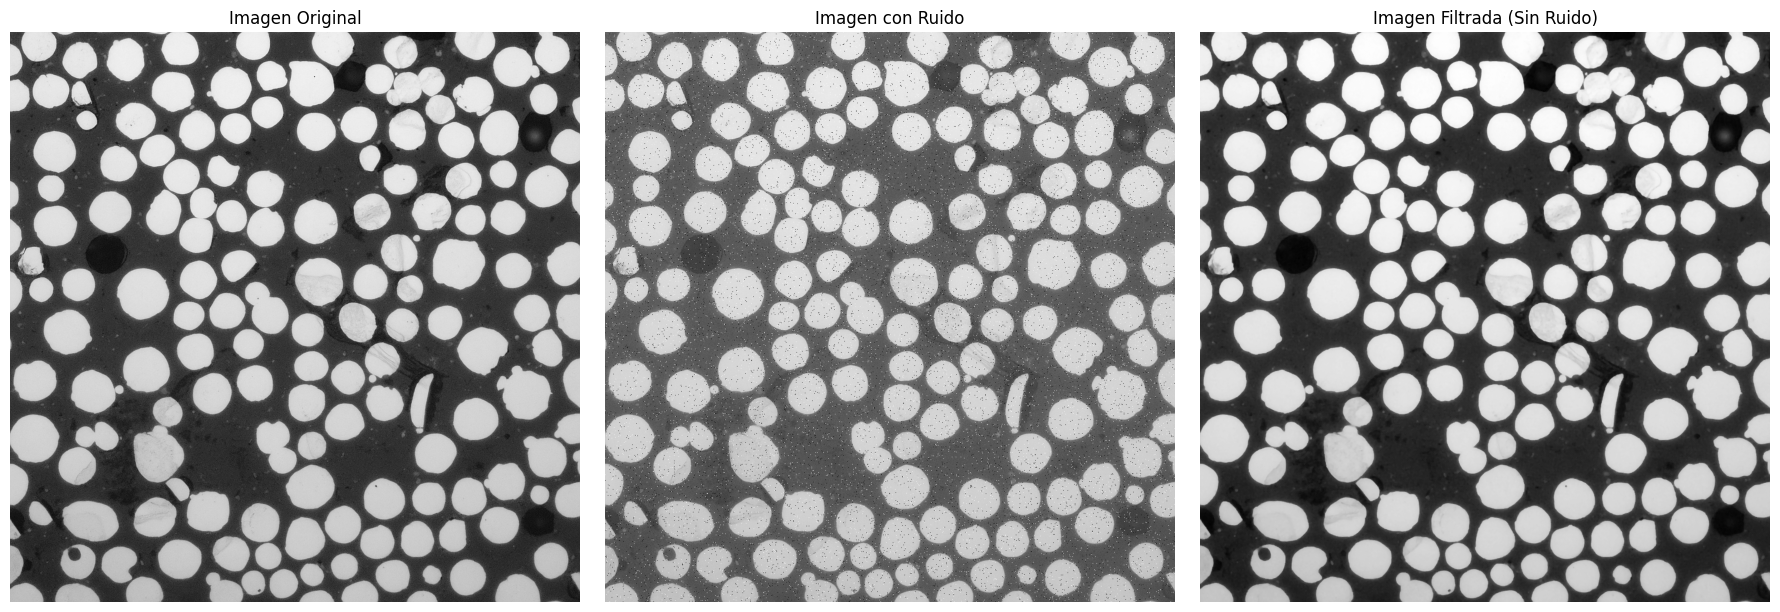

In [18]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from skimage import io, img_as_ubyte
from skimage.color import rgb2gray
from skimage.morphology import disk
from skimage.filters import median

img_original = io.imread('acero.png')

# Convertir la imagen a escala de grises y formato uint8
img = rgb2gray(img_original)
img = img_as_ubyte(img)

# Imagen con ruido: Agregar ruido sal y pimienta
noise = np.random.random(img.shape)  # números aleatorios uniformes entre 0 y 1
noisy_image = img.copy()
noisy_image[noise > 0.99] = 255
noisy_image[noise < 0.01] = 0

# Aplicar filtro mediano para eliminar el ruido
sel5 = disk(2)  # elemento estructurante disco de radio 2 píxeles
img_filtered = median(noisy_image, sel5)

# Mostrar un plot de tres imágenes
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(18, 6), sharex=True, sharey=True)

ax1.imshow(img, cmap=plt.cm.gray)
ax1.set_title('Imagen Original')
ax1.axis('off')

ax2.imshow(noisy_image, cmap=plt.cm.gray)
ax2.set_title('Imagen con Ruido')
ax2.axis('off')

ax3.imshow(img_filtered, cmap=plt.cm.gray)
ax3.set_title('Imagen Filtrada (Sin Ruido)')
ax3.axis('off')

plt.tight_layout()
plt.savefig('resultado_3_imagenes.png')
plt.show()

## 4. Segmenta la imagen utilizando un algoritmo de agrupamiento k-means con k = 2 y representa el resultado.
(* Recuerda usar la imagen resultante del apartado anterior, sin ruido)

*(1 punto)*

In [19]:
from sklearn.cluster import KMeans


v = img_filtered.reshape(img_filtered.shape[0]*img_filtered.shape[1], 1)


NC = 2
km_algo = KMeans(NC).fit(v)

In [20]:
km_algo.cluster_centers_

array([[212.13121205],
       [ 94.45775804]])

In [21]:
km_algo.labels_

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

Cluster centers:
[[ 94.45775804]
 [212.13121205]]


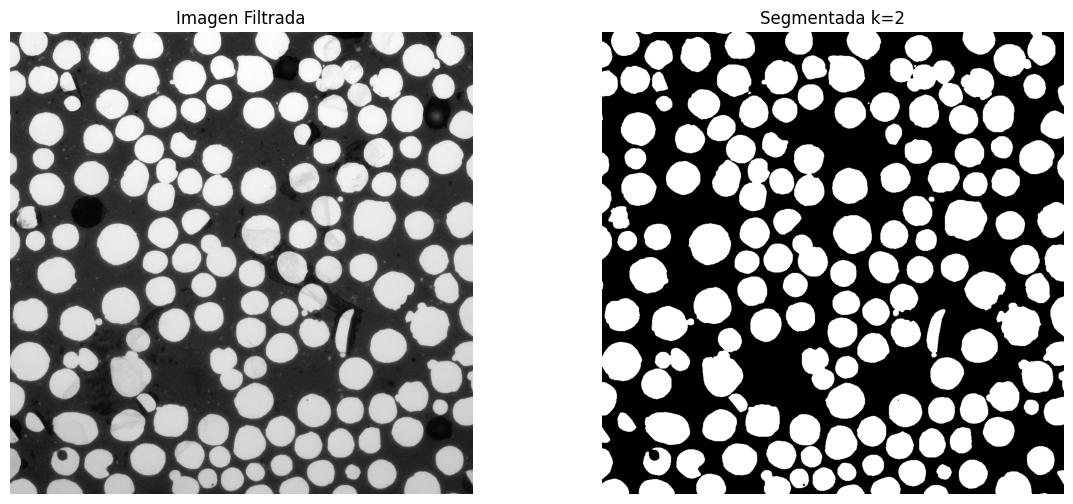

In [22]:
from sklearn.cluster import KMeans
import numpy as np

# Reshape the filtered image as 1d array
v = img_filtered.reshape(img_filtered.shape[0]*img_filtered.shape[1], 1)

# Fit a Kmeans clustering model with two clusters
NC = 2
km_algo = KMeans(NC, random_state=0).fit(v)

# Cluster centers
print("Cluster centers:")
print(km_algo.cluster_centers_)

# Reshape back result as image
segmented_image = km_algo.labels_.reshape(img_filtered.shape[0], img_filtered.shape[1])

# Display the result
plt.figure(figsize=(14, 6))
plt.subplot(121)
plt.imshow(img_filtered, cmap='gray')
plt.title('Imagen Filtrada')
plt.axis('off')

plt.subplot(122)
plt.imshow(segmented_image, cmap='gray')
plt.title('Segmentada k=2')
plt.axis('off')

plt.show()

## 5. Etiqueta los objetos encontrados en la imagen. Genera una figura con la imagen original y la imagen etiquetada.

*(1 punto)*


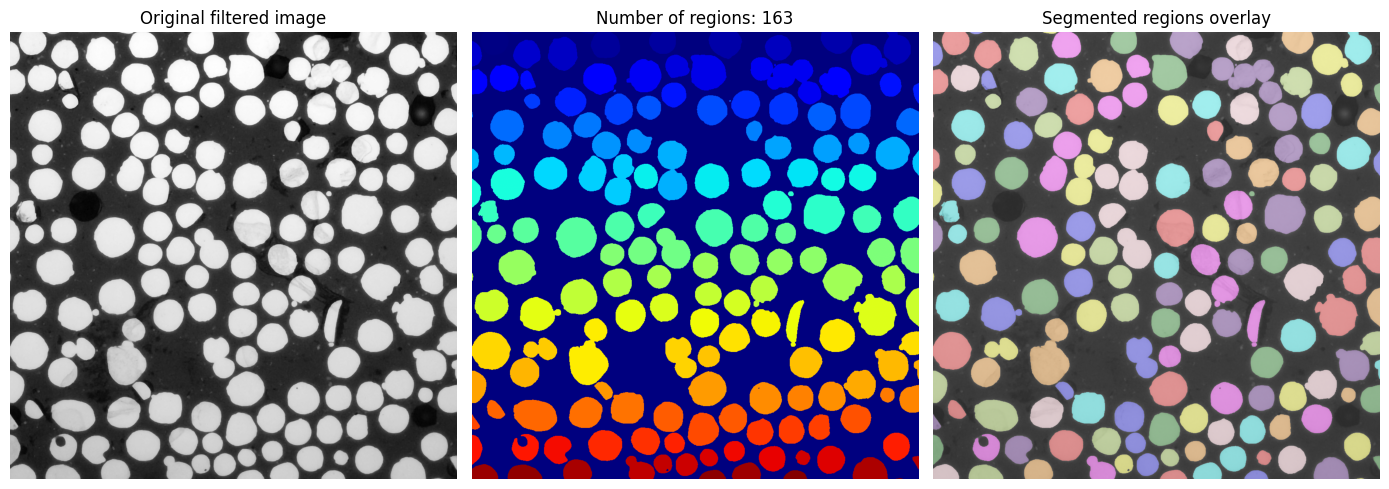

In [23]:
from skimage.measure import label
from skimage.color import label2rgb

# Label image regions:
labeled_image, nregions = label(segmented_image, return_num=True)
image_label_overlay = label2rgb(labeled_image, image=img_filtered)

# Get some figures:
fig, axes = plt.subplots(1, 3, figsize=(14, 9))
ax = axes.ravel()

ax[0].imshow(img_filtered, cmap=plt.cm.gray)
ax[0].set_title('Original filtered image')

ax[1].imshow(labeled_image, cmap=plt.cm.jet)
ax[1].set_title('Number of regions: {}'.format(nregions))

ax[2].imshow(image_label_overlay, cmap=plt.cm.jet)
ax[2].set_title('Segmented regions overlay')

ax[0].set_axis_off()
ax[1].set_axis_off()
ax[2].set_axis_off()

plt.tight_layout()
plt.show()

Descripción del resultado:
**¿Cuántas regiones hay en la imagen?** -> Hay 163 regiones

## 6. Extrae característica de cada región: el área, la longitud del eje mayor y la orientación de cada región. Informa de los valores promedio de las características extraídas. Representa un diagrama de dispersión (scatterplot) del área frente a la longitud del eje mayor.

*(1,5 puntos)*

In [24]:
from skimage import measure
import pandas as pd

# Extraer propiedades de cada región
props = measure.regionprops_table(labeled_image,
                                   properties=['label', 'area', 'major_axis_length', 'orientation'])

df_propietats = pd.DataFrame(props)
print(df_propietats)

     label    area  major_axis_length  orientation
0        1  2817.0          65.388636     1.567016
1        2   109.0          27.958041    -1.563785
2        3    94.0          31.355932     1.548550
3        4  3306.0          68.073202     1.283585
4        5  2628.0          63.918512    -1.567824
..     ...     ...                ...          ...
158    159  1669.0          62.765676     1.478118
159    160  2061.0          79.960426     1.520477
160    161   973.0          60.144845    -1.546959
161    162   835.0          53.178474    -1.559105
162    163    23.0          16.239492    -1.551280

[163 rows x 4 columns]


<Axes: xlabel='major_axis_length', ylabel='area'>

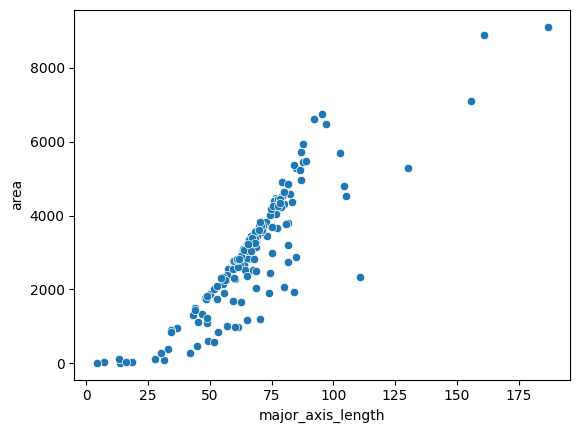

In [25]:
import seaborn as sns

# Diagrama de dispersión: Área vs Longitud del Eje Mayor
sns.scatterplot(x='major_axis_length', y='area', data=df_propietats)

## 7. Usando las regiones etiquetadas de la imagen, ¿cómo puedes filtrar las regiones para encontrar aquellas con un área mayor de 4000 píxeles? Indica cuántas regiones de ese tipo hay.
*(1,5 puntos)*

In [26]:
# Filtrar regiones con área mayor de 4000 píxeles
regiones_grandes = df_propietats[df_propietats['area'] > 4000]

# Mostrar las regiones filtradas
regiones_grandes

label    area  major_axis_length  orientation
9       10  4046.0          76.845940     0.029145
12      13  4308.0          79.932444     1.272728
14      15  5436.0          87.832830     0.684335
15      16  9110.0         186.878659     1.209539
16      17  4475.0          76.761471    -0.664724
17      18  4260.0          76.702462     1.329902
31      32  4574.0          82.646267    -0.204041
37      38  4428.0          76.707482     1.245785
47      48  4527.0          79.248611    -1.068435
48      49  7094.0         155.715192     0.016553
52      53  5288.0         130.262743    -0.197634
54      55  4388.0          76.027946    -1.314283
57      58  4900.0          79.195741     1.421551
61      62  4450.0          77.502080     1.325374
65      66  6756.0          95.579434    -1.322243
70      71  5730.0          87.021635     0.806373
73      74  6621.0          92.229110    -0.987010
78      79  4805.0         104.446699     0.565397
86      87  5279.0          85.086516     1.363653
88      89  5485.0          89.043007    -1.035695
94      95  5374.0          84.263474    -1.488994
97      98  4456.0          78.618391    -1.350888
100    101  6472.0          97.157661     0.791064
101    102  4975.0          86.783296     1.457598
102    103  4022.0          74.268646    -0.353676
106    107  8874.0         161.134129    -0.199758
107    108  4843.0          81.681879    -1.440011
110    111  5949.0          87.602385     1.256014
111    112  4542.0         105.315118     0.423037
114    115  4172.0          74.815872    -1.115353
115    116  4367.0          83.445129     0.782563
120    121  5232.0          86.410933    -1.213510
123    124  4254.0          75.447722     0.970307
127    128  4633.0          79.999720    -1.253503
128    129  4234.0          78.955310    -1.043856
129    130  5693.0         102.682614     1.330826
134    135  4246.0          77.430056    -0.348177
140    141  4346.0          78.289623     1.469758

Nombre total de régions : 163
Número de regiones con área mayor de 4000 píxeles: 38


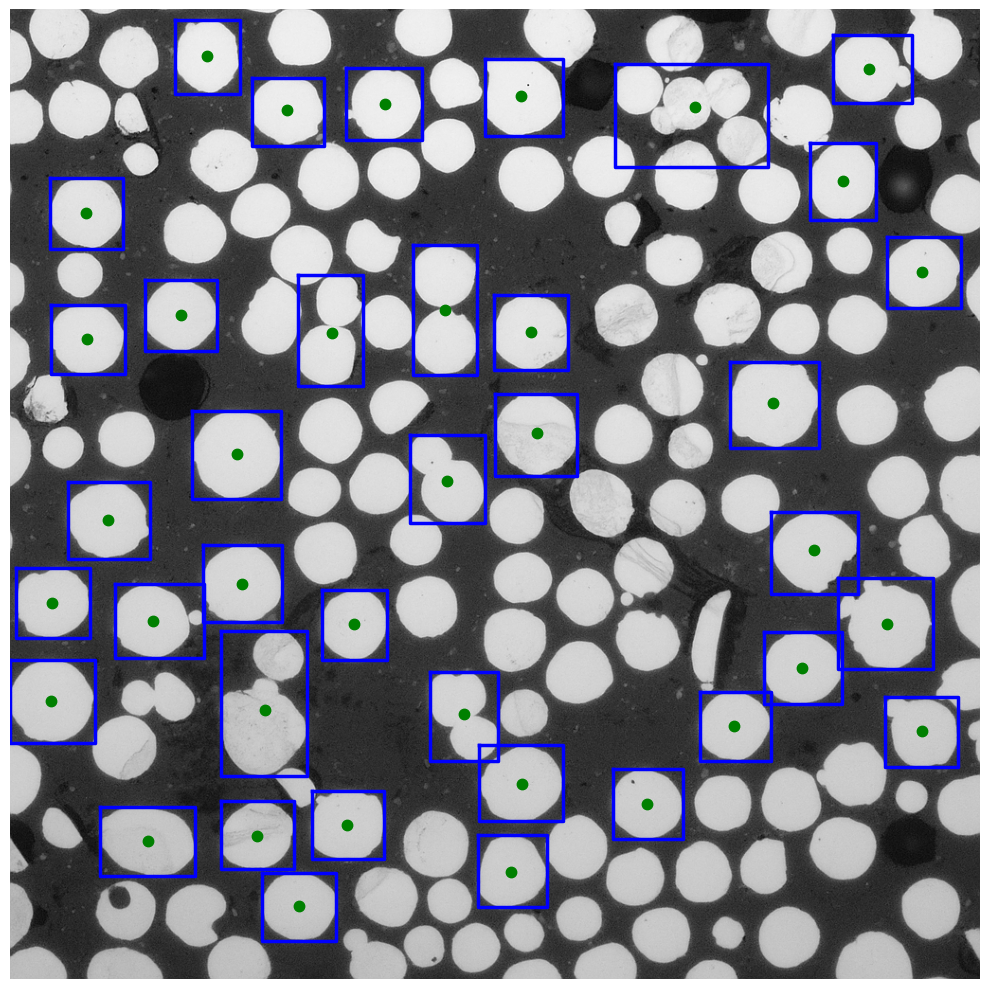

In [28]:
from skimage.measure import regionprops
import matplotlib.pyplot as plt


props = regionprops(labeled_image)
print(f'Nombre total de régions : {len(props)}')

regiones_grandes = [p for p in props if p.area > 4000]
num_regiones_grandes = len(regiones_grandes)
print(f'Número de regiones con área mayor de 4000 píxeles: {num_regiones_grandes}')


fig, ax = plt.subplots(figsize=(14, 10))
ax.imshow(IG, cmap=plt.cm.gray)

for p in regiones_grandes:
    y0, x0 = p.centroid
    ax.plot(x0, y0, '.g', markersize=15)
    minr, minc, maxr, maxc = p.bbox
    bx = (minc, maxc, maxc, minc, minc)
    by = (minr, minr, maxr, maxr, minr)
    ax.plot(bx, by, '-b', linewidth=2.5)

ax.set_axis_off()
plt.tight_layout()
plt.show()

## 8. Ahora usaremos el algoritmo Otsu utilizando la imagen sin ruído. Muestra los resultados e indica el número de regiones detectadas.

*(2 puntos)*

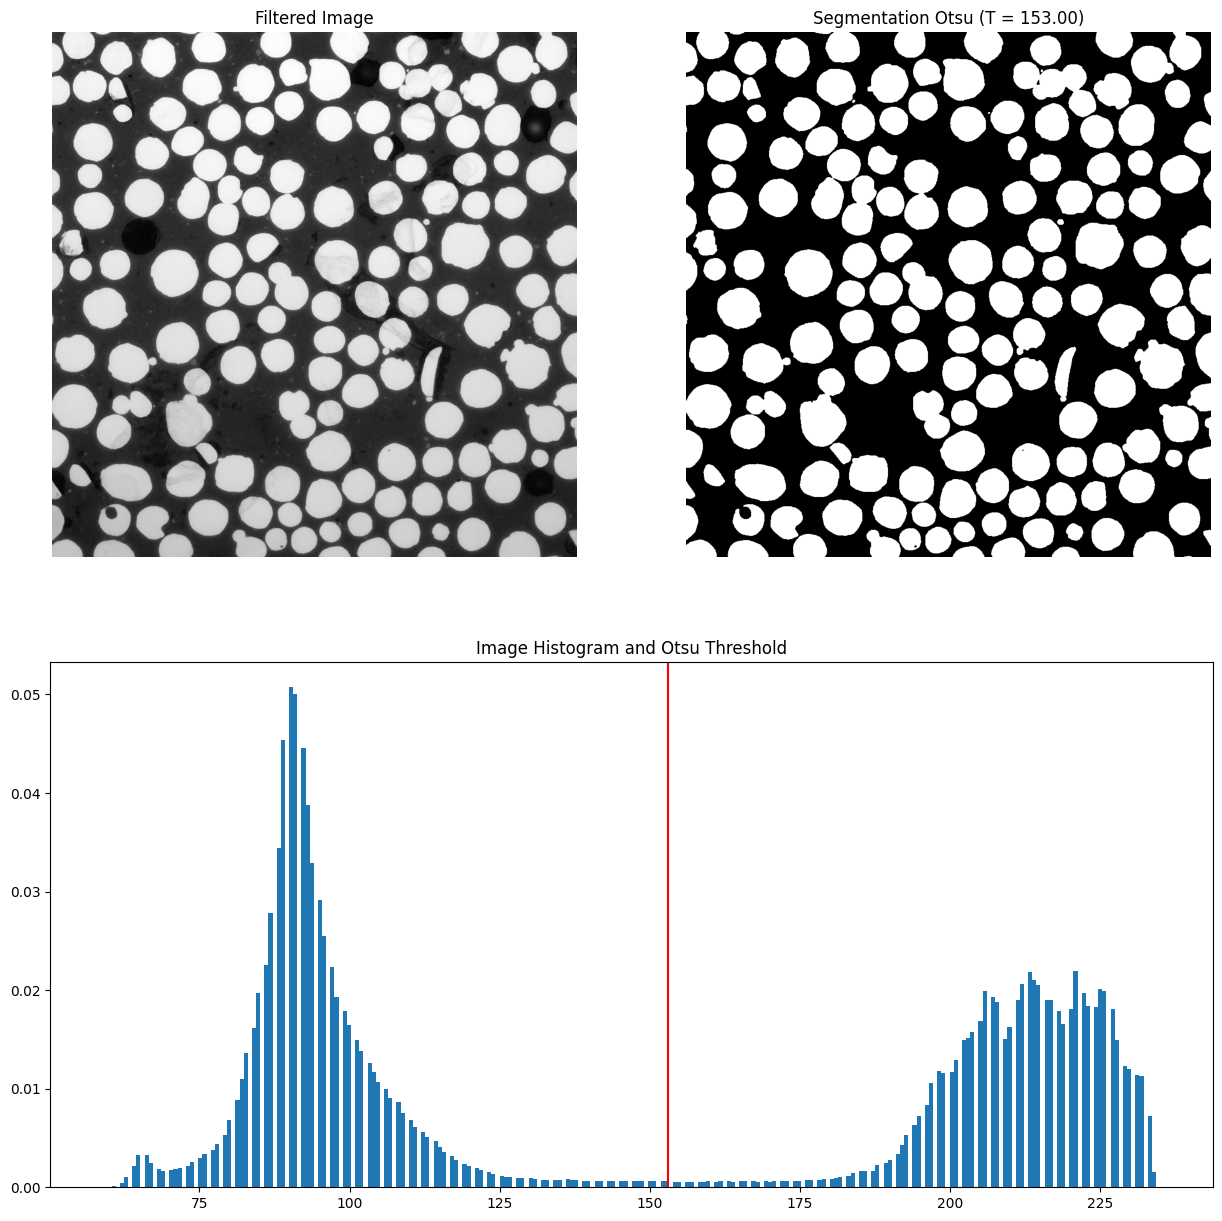

Número de regiones detectadas: 162


In [31]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
from skimage.filters import threshold_otsu
from skimage.measure import label

# Find Otsu's threshold for filtered image:
threshold_value = threshold_otsu(img_filtered)

# Apply threshold to filtered image:
img_otsu = img_filtered >= threshold_value

# Label detected regions:
labeled_otsu = label(img_otsu)
num_regiones = labeled_otsu.max()

fig = plt.figure(figsize=(15, 15))
gs = gridspec.GridSpec(2, 2)

ax1 = fig.add_subplot(gs[0,0])
ax1.imshow(img_filtered, cmap=plt.cm.gray)
ax1.set_title('Filtered Image')
ax1.set_axis_off()

ax2 = fig.add_subplot(gs[0,1])
ax2.imshow(img_otsu, cmap=plt.cm.gray)
ax2.set_title('Segmentation Otsu (T = {:.2f})'.format(threshold_value))
ax2.set_axis_off()

ax3 = fig.add_subplot(gs[1,:])
ax3.hist(img_filtered.ravel(), bins=256, density=True)
ax3.axvline(threshold_value, color='r')
ax3.set_title('Image Histogram and Otsu Threshold')
plt.show()

print(f'Número de regiones detectadas: {num_regiones}')

## 9. CONCLUSIÓN FINAL

- Que método ha funcionado mejor? Has obtenido los mismos resultados? Razona y discute los resultados.
- Haz una valoración general del curso y de los conceptos aprendidos.

*(1 punto)*

El método de Otsu ha funcionado mejor que k-means para segmentar la imagen de acero. En efecto Otsu ha dado resultados más nítidos y coherentes porque encuentra automáticamente el mejor umbral para separar el fondo de las partículas metálicas. Mienras que K-means ha agrupada los píxeles por similitud sin realmente comprender la estructura de la imagen, lo que puede crear pequeños fragmentos aislados y dar un resultado más "sucio".

Por eso, k-means detecta generalmente más regiones, pero muchas son fragmentos que no corresponden a partículas reales.
Aqui, en este caso solo hay una region de menos.
Otsu es más efficiente para este tipo de imagen donde tenemos claramente dos grupos (fondo negro y granos claros).

 Los dos métodos se beneficiaron del filtrado de ruido al inicio, sino los resultados habrían sido mucho menos buenos.
Las características medidas (área, ejes, orientación) muestran que los granos de acero tienen tamaños bastante similares y están orientados de forma aleatoria, lo cual es normal para este material.

El curso ha sido muy útil para entender como analizar imagenes de forma automatica. Hemos aprendido las bases esenciales: cargar y visualizar imagenes, limpiar el ruido que puede perturbar el analisis, y luego utilizar diferentes técnicas para identificar regiones en la imagen y tambien identificar las texturas. Ademas he aprendido como asociar un github ( una herramienta que nunca habia utilizado antes). Lo interesante es que hemos podido comparar varios enfoques y ver cual  funciona mejor según el caso. Eso podria ser util en nuestra vida en el futuro cuando deberiamos por ejemplo analasiar imagenes de materiales y identifcar los defectos.